In [216]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pylab as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [179]:
whos

Variable           Type                          Data/Info
----------------------------------------------------------
NamespaceMagics    MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
StandardScaler     type                          <class 'sklearn.preproces<...>ing.data.StandardScaler'>
cmap               LinearSegmentedColormap       <matplotlib.colors.Linear<...>ct at 0x000001FB0302B208>
corr               DataFrame                               Survived    Pcl<...>60887  0.217532  1.000000
corrmap            AxesSubplot                   AxesSubplot(0.125,0.11;0.62x0.77)
get_ipython        function                      <function get_ipython at 0x000001FB68121E18>
getsizeof          builtin_function_or_method    <built-in function getsizeof>
json               module                        <module 'json' from 'C:\\<...>\lib\\json\\__init__.py'>
labels             silent_list                   <a list of 6 Text xticklabel objects>
loc           

In [180]:
train = pd.read_csv("C:\\users\\jason\\projects\\titantic\\data\\train.csv")

In [181]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [182]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [183]:
train.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1, inplace=True),

(None,)

In [184]:
train.Age.fillna(train.Age.mean(), inplace=True)
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [185]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [186]:
train.groupby(['Survived']).describe().unstack()

               Survived
Age     count  0           549.000000
               1           340.000000
        mean   0            30.415100
               1            28.423600
        std    0            12.457370
               1            13.682862
        min    0             1.000000
               1             0.420000
        25%    0            23.000000
               1            21.000000
        50%    0            29.699118
               1            29.699118
        75%    0            35.000000
               1            35.000000
        max    0            74.000000
               1            80.000000
Fare    count  0           549.000000
               1           340.000000
        mean   0            22.117887
               1            48.209498
        std    0            31.388207
               1            66.748773
        min    0             0.000000
               1             0.000000
        25%    0             7.854200
               1          

In [187]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [188]:
train.groupby('Sex').size()

Sex
female    312
male      577
dtype: int64

In [189]:
train.skew()

Survived    0.484568
Pclass     -0.636998
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        4.801440
dtype: float64

In [190]:
pandas_profiling.ProfileReport(train)

Number of variables,9
Number of observations,889
Total Missing (%),0.0%
Total size in memory,62.6 KiB
Average record size in memory,72.1 B
Numeric,7
Categorical,2
Date,0
Text (Unique),0
Rejected,0
Distinct count,89


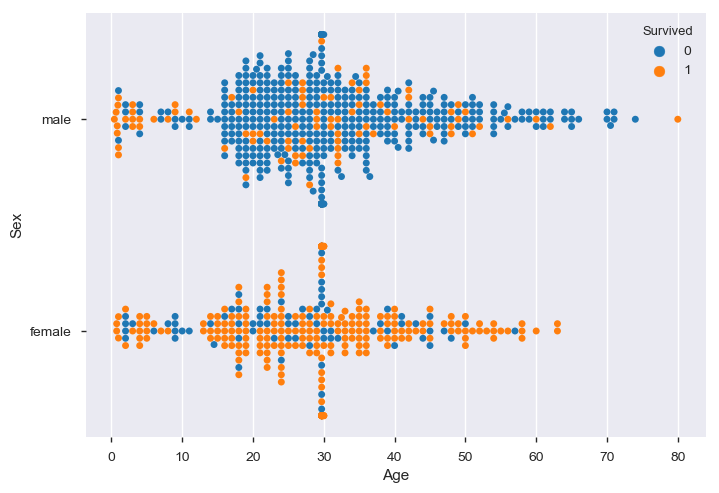

In [191]:
sns.swarmplot(x="Age", y="Sex", hue="Survived", data=train)

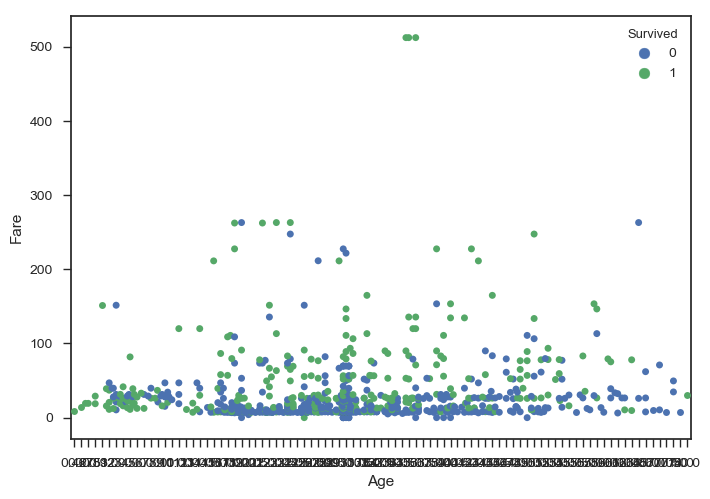

In [214]:
sns.swarmplot(x="Age", y="Fare", hue="Survived", data=train)

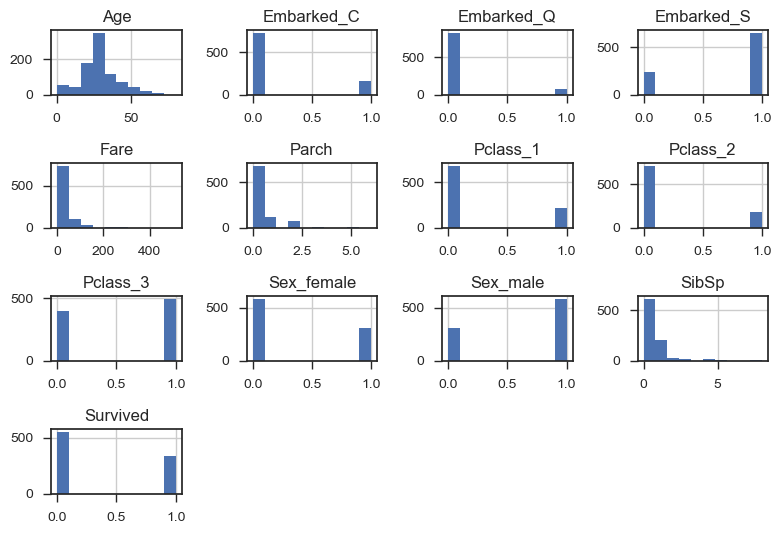

In [208]:
train.hist()
plt.tight_layout()

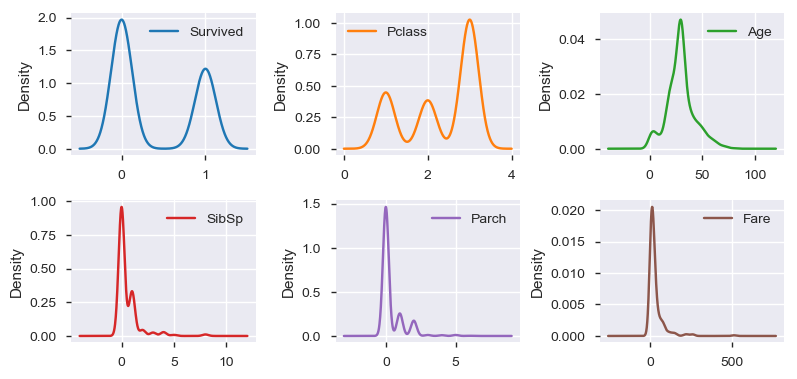

In [193]:
train.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.tight_layout()

In [207]:
train.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()

ValueError: Layout of 3x3 must be larger than required size 13

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB1138E4A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FB0DAB72E8>]], dtype=object)

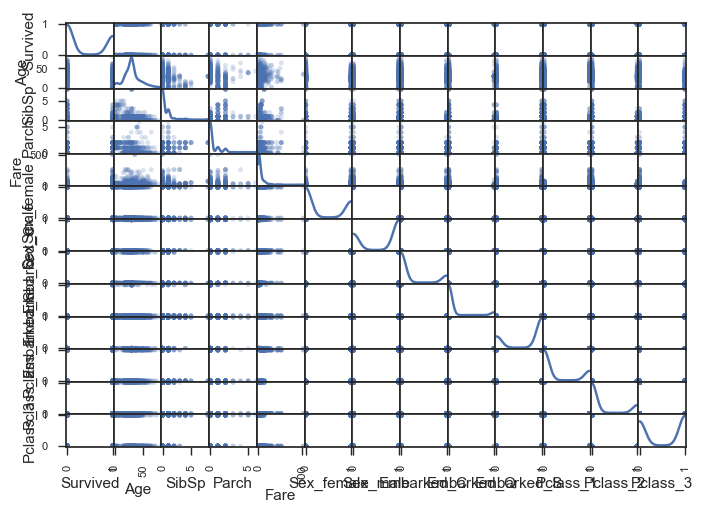

In [205]:
scatter_matrix(train, alpha=0.2, diagonal='kde')
plt.tight_layout()

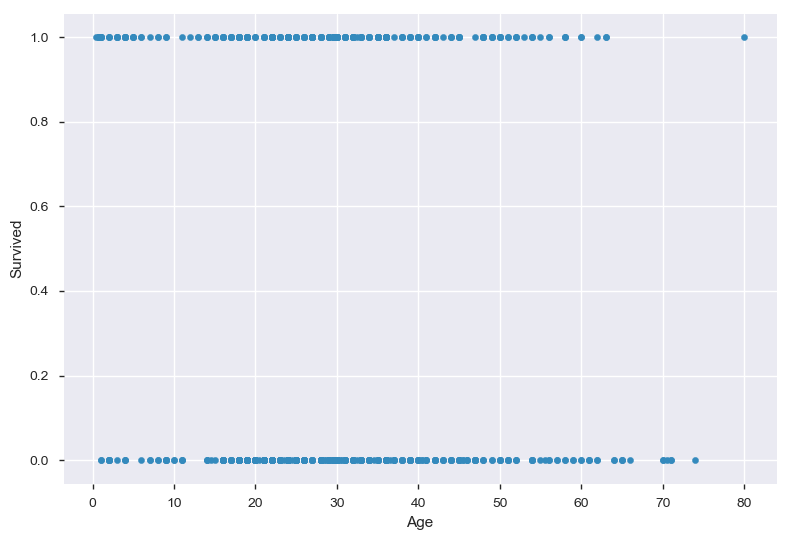

In [196]:
train.plot.scatter(x='Age', y='Survived')
plt.tight_layout()

In [197]:
train.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


[Text(0,0.5,'Pclass_3'),
 Text(0,1.5,'Pclass_2'),
 Text(0,2.5,'Pclass_1'),
 Text(0,3.5,'Embarked_S'),
 Text(0,4.5,'Embarked_Q'),
 Text(0,5.5,'Embarked_C'),
 Text(0,6.5,'Sex_male'),
 Text(0,7.5,'Sex_female'),
 Text(0,8.5,'Fare'),
 Text(0,9.5,'Parch'),
 Text(0,10.5,'SibSp'),
 Text(0,11.5,'Age'),
 Text(0,12.5,'Survived')]

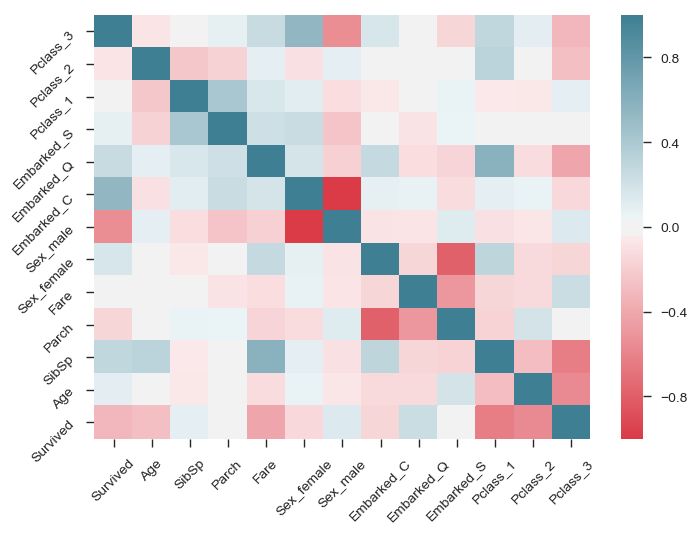

In [203]:
corr = train.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
corrmap = sns.heatmap(corr, cmap=cmap,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
loc, labels = plt.xticks()
corrmap.set_xticklabels(labels, rotation=45)
corrmap.set_yticklabels(labels[::-1], rotation=45) 

C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Jason\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


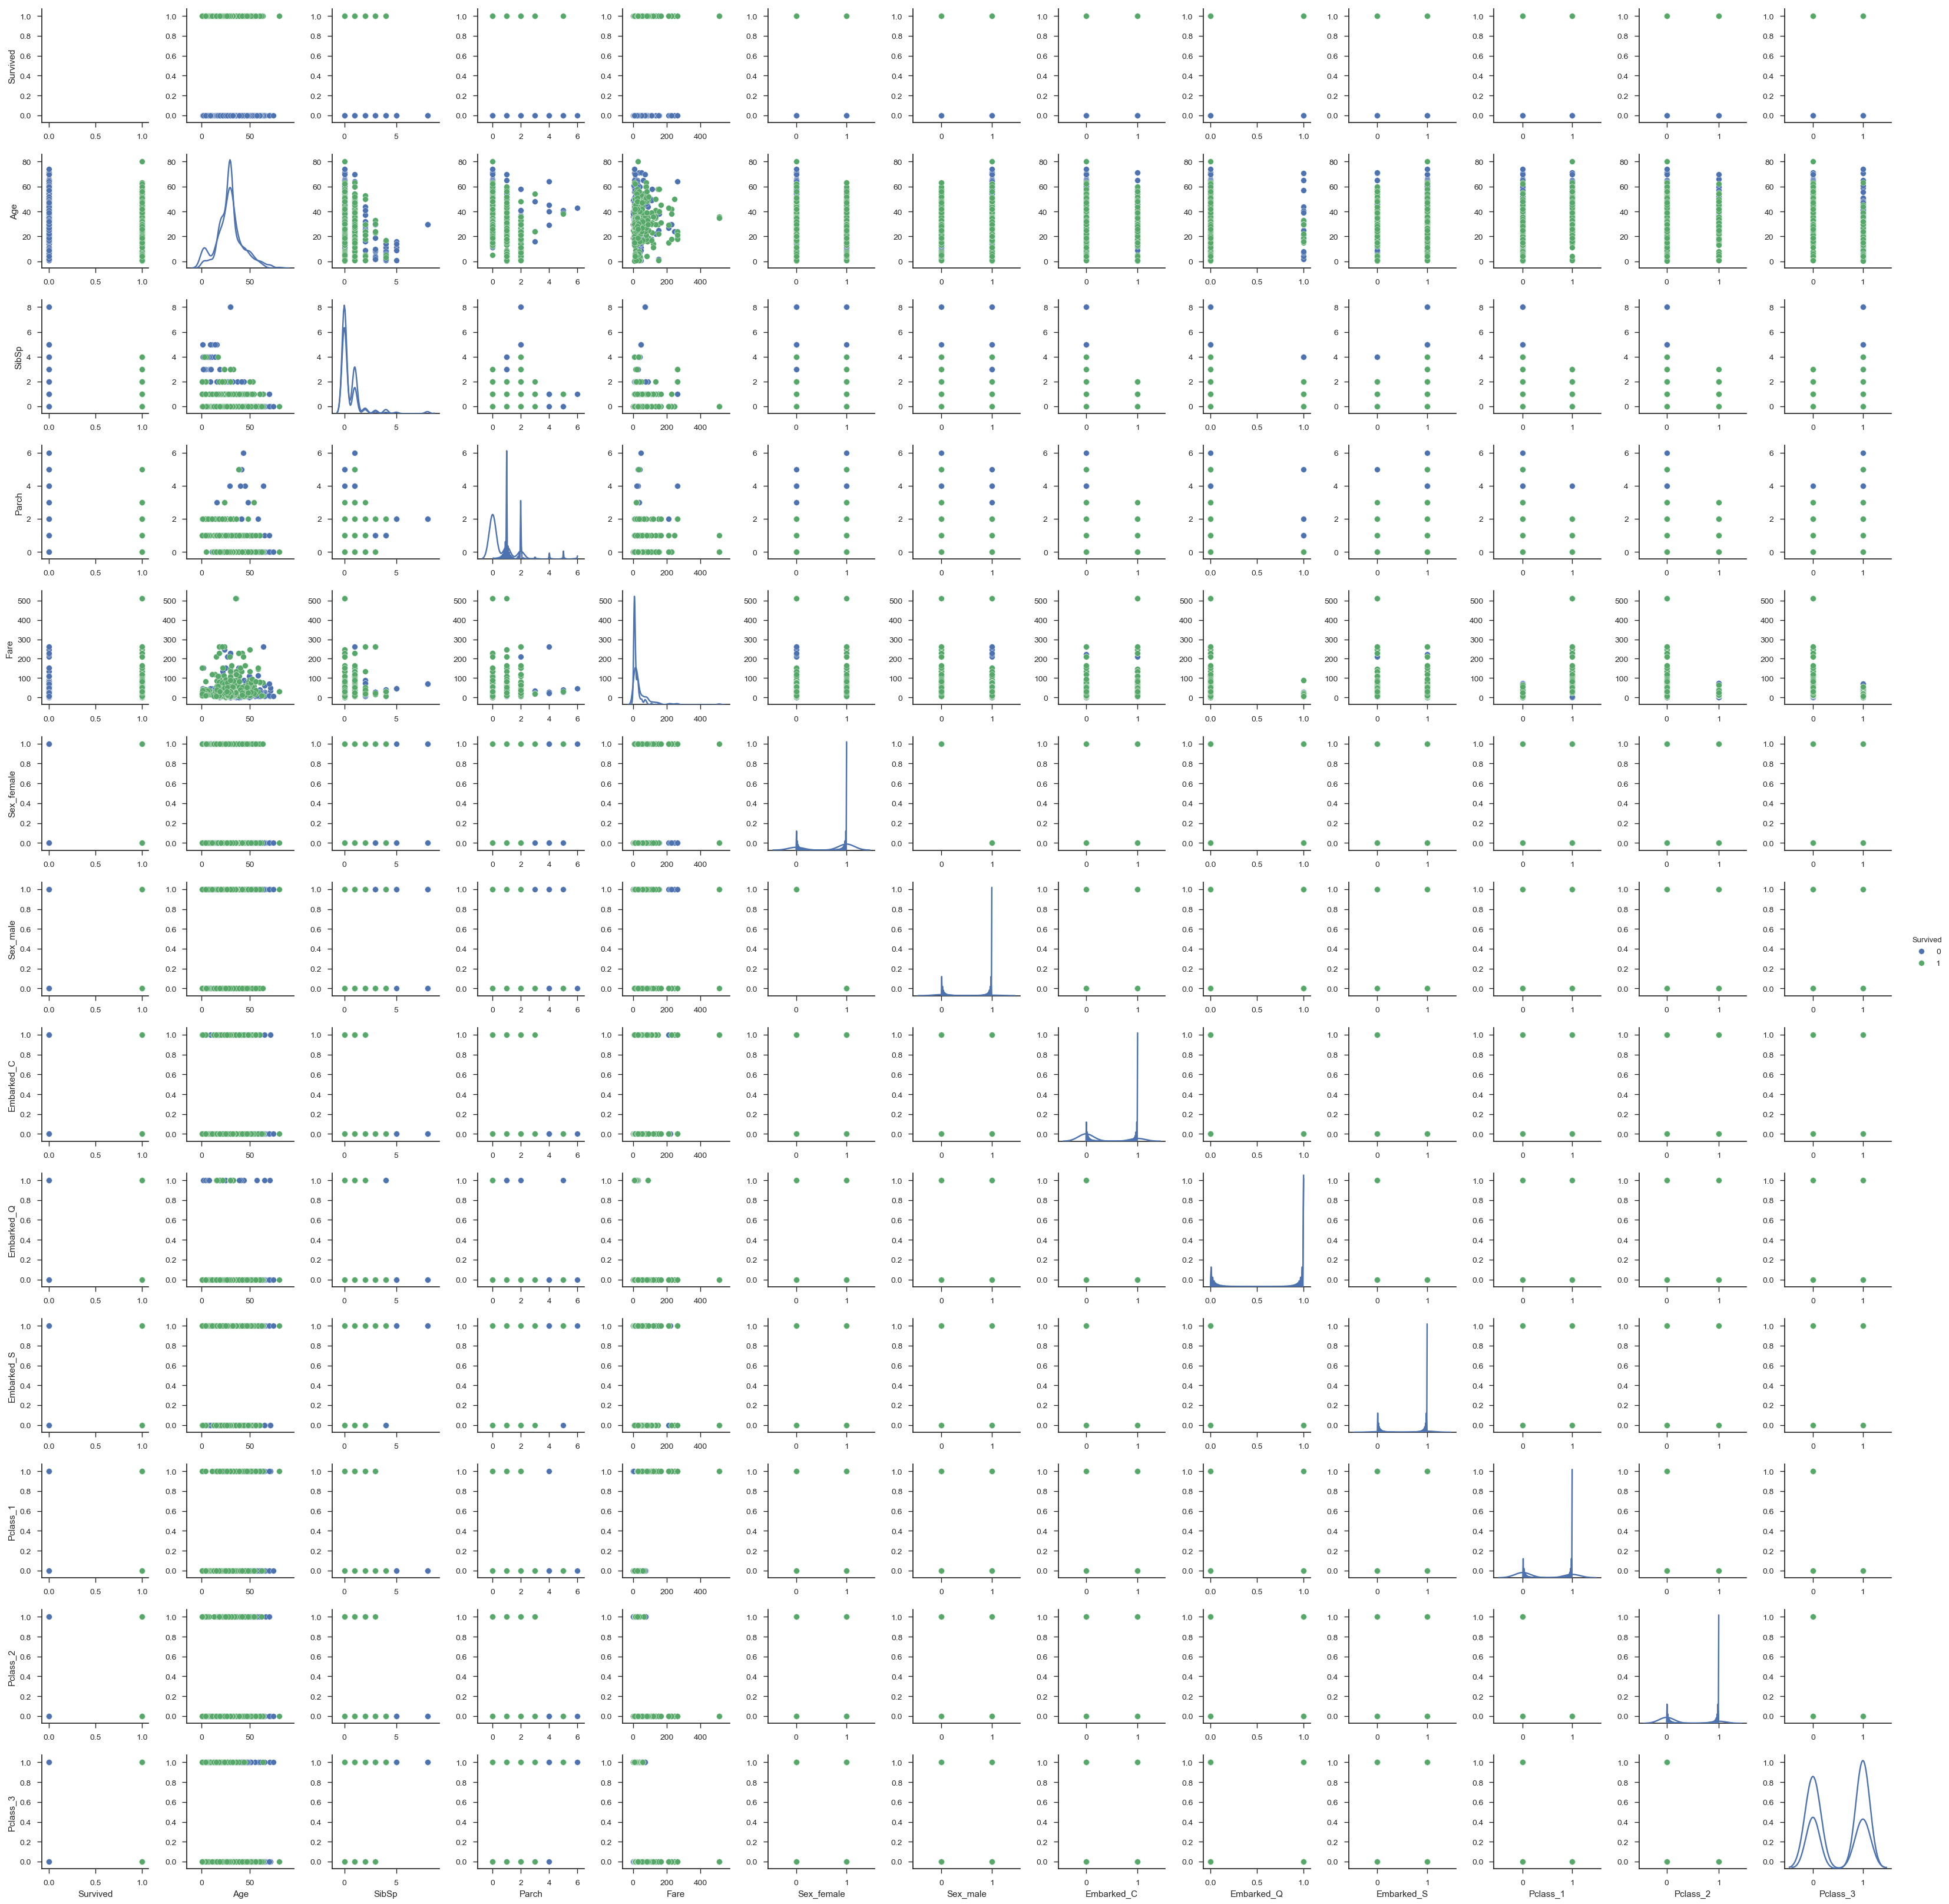

In [206]:
sns.set(style="ticks")
sns.pairplot(train, hue="Survived", dropna  = True, diag_kind  = 'kde')

In [200]:
#train['Age'] = StandardScaler().fit_transform(train[['Age']])
#train['Fare'] = StandardScaler().fit_transform(train[['Fare']])
#train.Fare.hist()

In [201]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Pclass'])

In [202]:
train

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
5,0,29.699118,0,0,8.4583,0,1,0,1,0,0,0,1
6,0,54.000000,0,0,51.8625,0,1,0,0,1,1,0,0
7,0,2.000000,3,1,21.0750,0,1,0,0,1,0,0,1
8,1,27.000000,0,2,11.1333,1,0,0,0,1,0,0,1
9,1,14.000000,1,0,30.0708,1,0,1,0,0,0,1,0


In [218]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train[['Age','Fare']])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

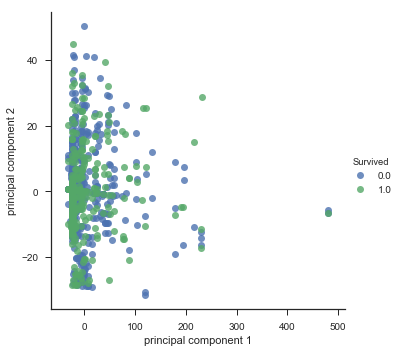

In [230]:
finalDf = pd.concat([principalDf, train[['Survived']]], axis = 1)
sns.lmplot(x="principal component 1", y="principal component 2", hue='Survived', fit_reg = False, data=finalDf)

In [234]:
pca.explained_variance_ratio_

array([ 0.93678495,  0.06321505])

In [233]:
pd.DataFrame(pca.components_, columns = train[['Age','Fare']].columns, index=[1, 2])

,Age,Fare
1,0.024788,0.999693
2,0.999693,-0.024788


In [237]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(principalComponents, pca.components_, train[['Age','Fare']].columns.values)

Features by importance:
 [(480.0963453793855, 'Fare'), (51.75517601854786, 'Age')]
